In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv("/content/project6.csv",names=['Age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','over 50K'],header=0)
df

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over 50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.shape

(32560, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  over 50K        32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.isnull().sum()

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
over 50K          0
dtype: int64

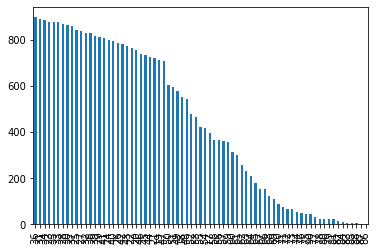

In [ ]:
# Age counts 
df['Age'].value_counts().plot(kind='bar')

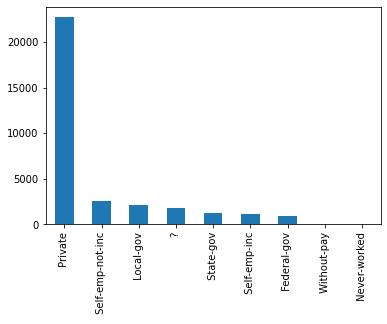

In [ ]:
# Mximum Number of people lies in workclass 
df['workclass'].value_counts().plot(kind='bar')

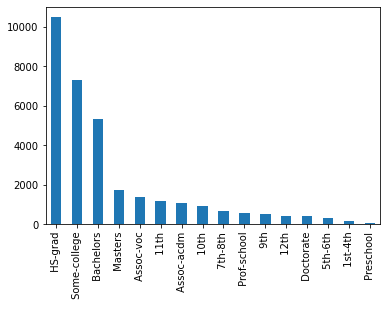

In [ ]:
# Number of people lies in Education catogary 
df['education'].value_counts().plot(kind='bar')

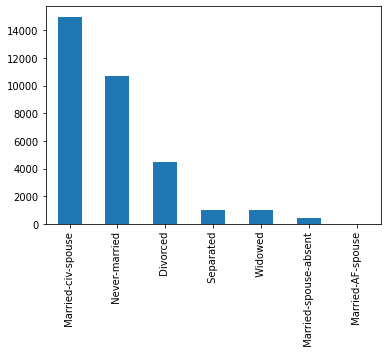

In [ ]:
# Value count with Marital status 
df['marital-status'].value_counts().plot(kind='bar')

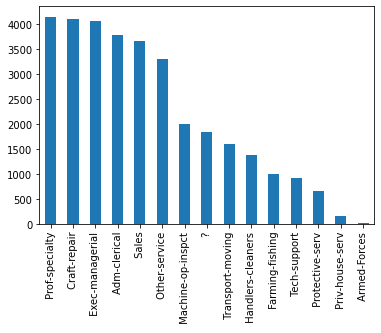

In [ ]:
df['occupation'].value_counts().plot(kind='bar')

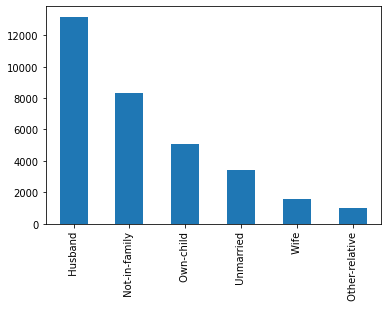

In [ ]:
# Family relationship value counts 
df['relationship'].value_counts().plot(kind='bar')

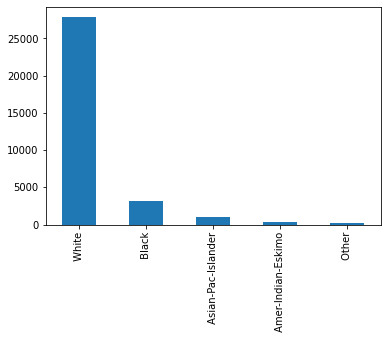

In [ ]:
# Most Number of people lies in white (Race) in  database
df['race'].value_counts().plot(kind='bar')

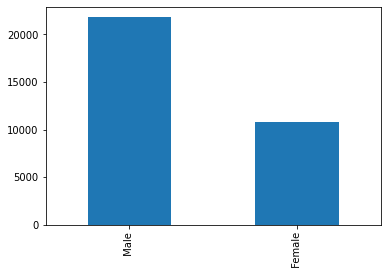

In [ ]:
# sex value count 
df['sex'].value_counts().plot(kind='bar')

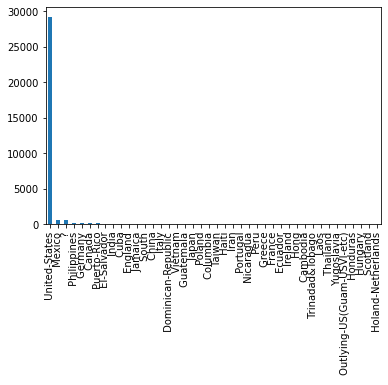

In [ ]:
df['native-country'].value_counts().plot(kind='bar')

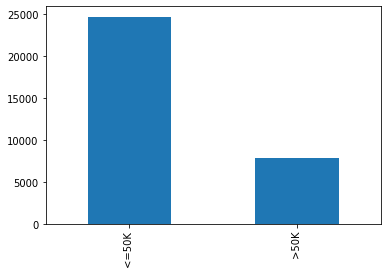

In [ ]:

df['over 50K'].value_counts().plot(kind='bar')

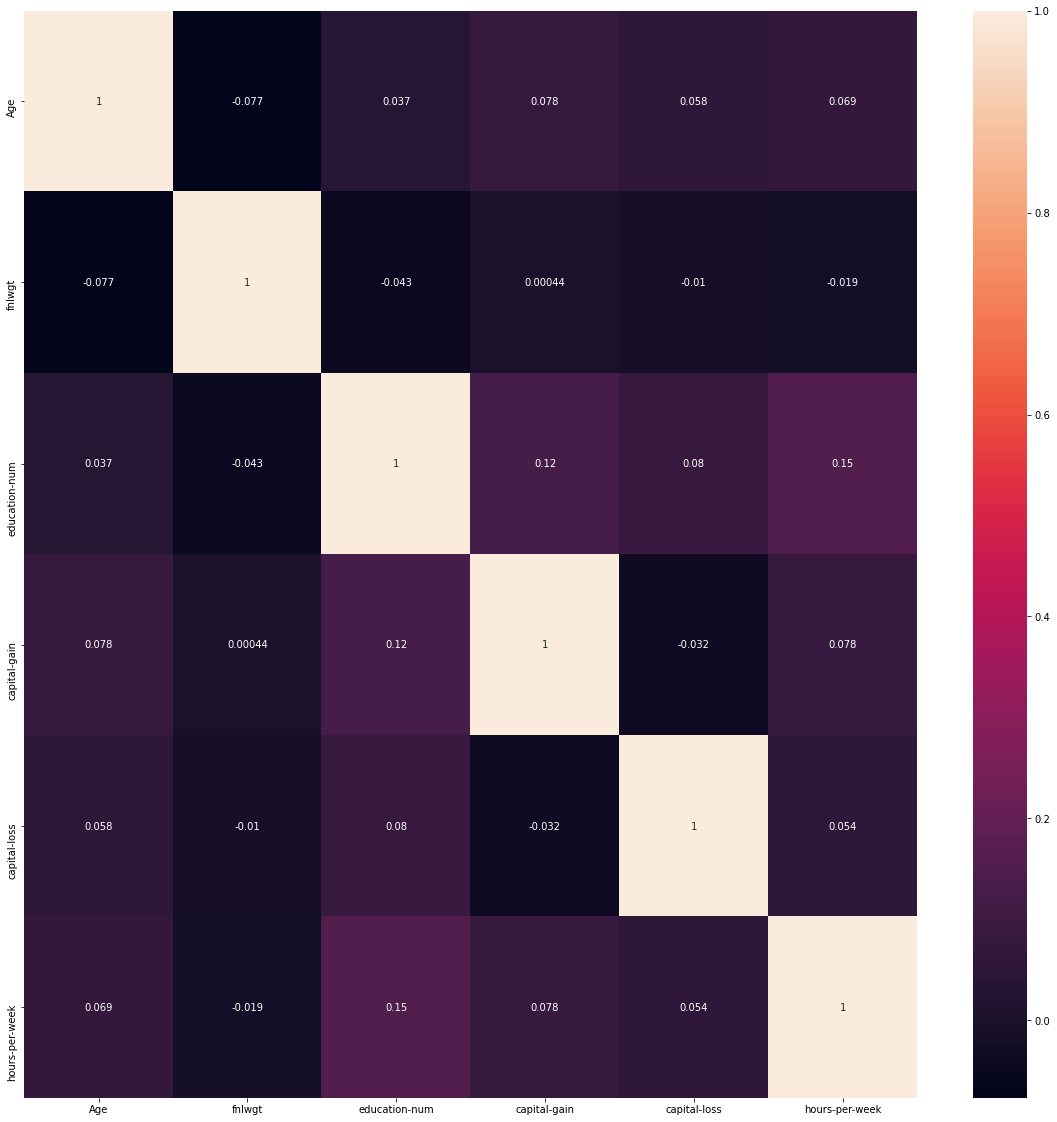

In [ ]:
# correlation between columns 
corr_hmap=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [ ]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [ ]:
df

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over 50K
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,4,16527,7,11,2,13,5,4,0,0,0,37,39,0
32556,23,4,8079,11,8,2,7,0,4,1,0,0,39,39,1
32557,41,4,7882,11,8,6,1,4,4,0,0,0,39,39,0
32558,5,4,12880,11,8,4,1,3,4,1,0,0,19,39,0


In [ ]:
# Checking and removing outliers from data 
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(32560, 15)
(26735, 15)


In [ ]:
df1.skew()

Age               0.512903
workclass        -0.746686
fnlwgt            0.042344
education        -0.953893
education-num    -0.150206
marital-status   -0.086741
occupation        0.136047
relationship      0.709768
race             -2.524414
sex              -0.649131
capital-gain      6.044493
capital-loss      9.786982
hours-per-week   -0.382335
native-country   -5.338005
over 50K          1.577615
dtype: float64

In [ ]:
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.sqrt(df1[col])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df1.skew()

Age               0.512903
workclass        -0.746686
fnlwgt            0.042344
education        -0.953893
education-num    -0.150206
marital-status   -0.086741
occupation        0.136047
relationship      0.067756
race             -2.524414
sex              -0.649131
capital-gain      5.501008
capital-loss      9.012338
hours-per-week   -0.382335
native-country   -5.338005
over 50K          1.577615
dtype: float64

In [ ]:
x=df1.iloc[:,0:-1]
y=y=df1.iloc[:,-1]
x,y

(       Age  workclass  fnlwgt  ...  capital-loss  hours-per-week  native-country
 0       33          6    2925  ...           0.0              12              39
 1       21          4   14085  ...           0.0              39              39
 2       36          4   15335  ...           0.0              39              39
 4       20          4   17699  ...           0.0              39              39
 5       32          4    8535  ...           0.0              15              23
 ...    ...        ...     ...  ...           ...             ...             ...
 32554    5          4   18559  ...           0.0              39              39
 32555   10          4   16527  ...           0.0              37              39
 32556   23          4    8079  ...           0.0              39              39
 32557   41          4    7882  ...           0.0              39              39
 32558    5          4   12880  ...           0.0              19              39
 
 [26735 rows x

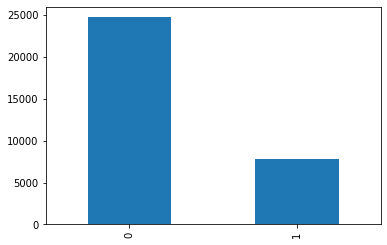

In [42]:
# checking value counts of Target
df['over 50K'].value_counts().plot(kind='bar')

In [ ]:
# Due to class imbalanced data , Using over sampling SMORT 
from imblearn.over_sampling import SMOTE
smote=SMOTE()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X,Y=smote.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print('b_y', Counter(y))
print("a_y",Counter(Y))

b_y Counter({0.0: 21646, 1.0: 5089})
a_y Counter({0.0: 21646, 1.0: 21646})


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20,stratify=Y)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(34633, 14) (8659, 14)
(34633,) (8659,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=6)
sv=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [ ]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',sv))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

****************************** KNeighborsClassifier ********************************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score= 0.7825383993532741


cross_val_score= 0.7970542562459422


roc_auc_score= 0.7825278200566884


classification_report
               precision    recall  f1-score   support

         0.0       0.85      0.69      0.76      4329
         1.0       0.74      0.87      0.80      4330

    accuracy                           0.78      8659
   macro avg       0.79      0.78      0.78      8659
weighted avg       0.79      0.78      0.78      8659



[[2991 1338]
 [ 545 3785]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************** SVC ********************************************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_func

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.7429264349232013




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


cross_val_score= 0.748083871755927


roc_auc_score= 0.7429230971956144


classification_report
               precision    recall  f1-score   support

         0.0       0.76      0.71      0.74      4329
         1.0       0.73      0.77      0.75      4330

    accuracy                           0.74      8659
   macro avg       0.74      0.74      0.74      8659
weighted avg       0.74      0.74      0.74      8659



[[3091 1238]
 [ 988 3342]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************** DecisionTreeClassifier ********************************************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_s

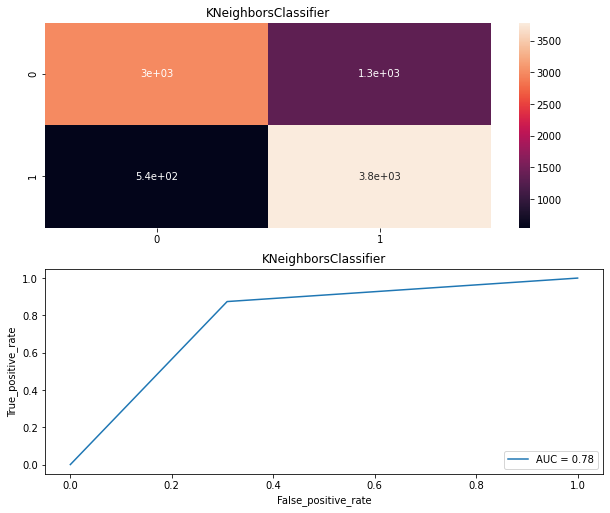

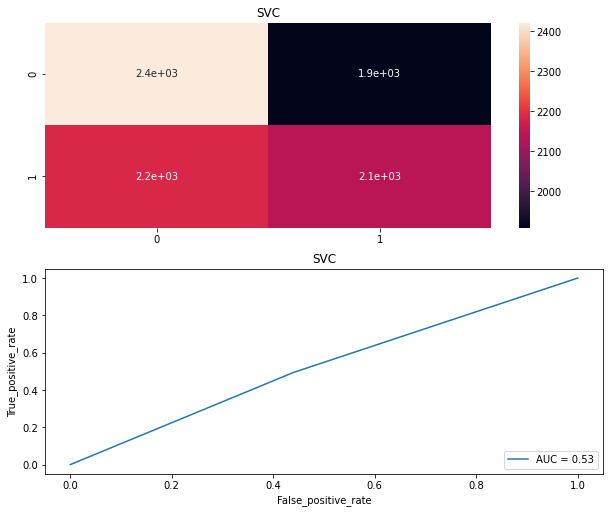

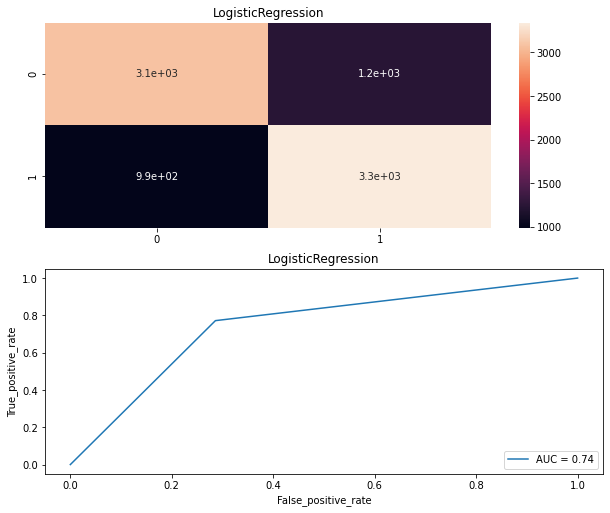

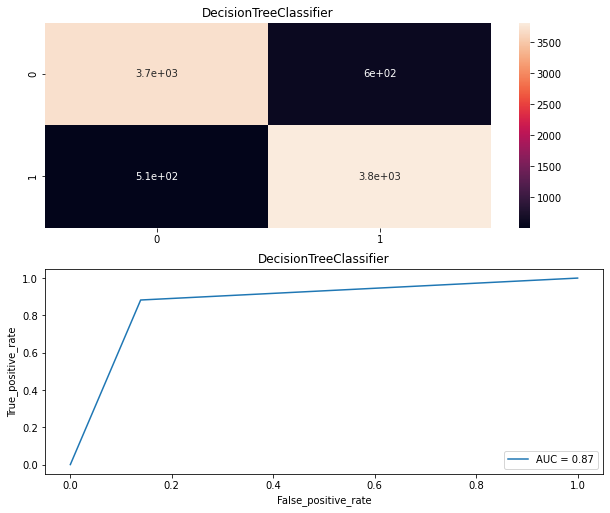

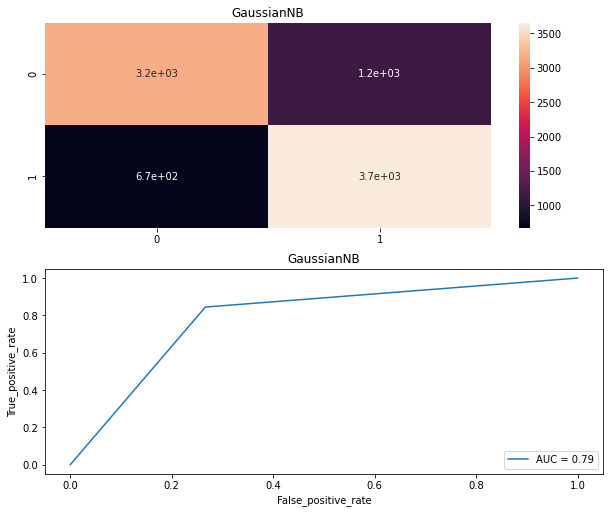

In [33]:
Model = []
score = []
cvs = []
rocscore=[]
for name,model in models:
    print('******************************',name,'********************************************')
    print('\n')
    Model.append(name)
    model.fit(X_train,Y_train)
    print(model)
    pre=model.predict(X_test)
    print('\n')
    AS=accuracy_score(Y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,Y,cv=10,scoring='accuracy').mean()
    print("cross_val_score=",sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test,pre)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(Y_test,pre))
    print('\n')
    cm=confusion_matrix(Y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [34]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cvs,'ROC_AUC_curve':rocscore})

In [35]:
result

,Model,Accuracy_score,Cross_val_score,ROC_AUC_curve
0,KNeighborsClassifier,78.253840,79.705426,78.252782
1,SVC,52.708165,51.963384,52.708536
2,LogisticRegression,74.292643,74.808387,74.292310
3,DecisionTreeClassifier,87.192516,86.220020,87.192395
4,GaussianNB,78.923663,79.125676,78.923024


In [41]:
import pickle
project6_model = pickle.dumps(DT) 
DT_from_pickle = pickle.loads(project6_model) 
DT_from_pickle.predict(X_test) 


array([0., 0., 1., ..., 1., 1., 0.])